In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np

import sys
import os
# Current working directory in Jupyter Notebook
project_root = os.getcwd()  # Current working directory
project_root = os.path.join(project_root, '..')  # Move one level up to the root
sys.path.append(project_root)
# from importlib import reload
# import utils.custom
# reload(utils.custom)
from utils.custom import calculate_metrics, plot_returns
from definitions.constants import DIFF_REBALANCING_STOCK_DICT_ALL_PKL, DIFF_REBALANCING_RETURNS_ALL_PKL, DATE_GS_CUTOFF #DIFF_REBALANCING_COMBINED_DATA_CSV


# dfsfilename=DIFF_REBALANCING_COMBINED_DATA_ALL_CSV
# dfsfilename=dfsfilename
# picasodfs=pd.read_pickle(dfsfilename)

stock_dict_filename=DIFF_REBALANCING_STOCK_DICT_ALL_PKL
stock_dict_filename=stock_dict_filename
stks=pd.read_pickle(stock_dict_filename)

rets_filename=DIFF_REBALANCING_RETURNS_ALL_PKL
rets_filename=rets_filename
retss=pd.read_pickle(rets_filename)


In [2]:
# picasodfs[0]

In [ ]:
retss[0]

,returns
t,
2007-01-31,-1.463802
2007-02-28,-11.884665
2007-03-30,1.544895
2007-04-30,14.775373
2007-05-31,5.884472
...,...
2024-07-31,-4.398661
2024-08-30,6.505696
2024-09-30,6.266868


In [4]:
stks[0]

{'2007-01-31': array(['RIMM', 'PD', 'CMCSA', 'GS', 'X', 'T', 'HPQ', 'CSCO'], dtype=object),
 '2007-02-28': array(['RIMM', 'PD', 'X', 'GS', 'GM', 'T', 'CMCSA', 'AAPL'], dtype=object),
 '2007-03-30': array(['X', 'RIMM', 'AAPL', 'T', 'GS', 'MRO', 'CMCSA', 'ORCL'],
       dtype=object),
 '2007-04-30': array(['X', 'RIMM', 'AAPL', 'MRK', 'T', 'GS', 'MRO', 'CVX'], dtype=object),
 '2007-05-31': array(['RIMM', 'AAPL', 'X', 'MRO', 'T', 'MRK', 'GS', 'NVDA'], dtype=object),
 '2007-06-29': array(['RIMM', 'AAPL', 'NVDA', 'X', 'RIG', 'MRO', 'SLB', 'T'],
       dtype=object),
 '2007-07-31': array(['RIMM', 'NVDA', 'AAPL', 'SLB', 'RIG', 'CSCO', 'X', 'AMAT'],
       dtype=object),
 '2007-08-31': array(['AAPL', 'NVDA', 'SLB', 'RIG', 'CSCO', 'IBM', 'X', 'INTC'],
       dtype=object),
 '2007-09-28': array(['AAPL', 'NVDA', 'SLB', 'X', 'RIG', 'EEM', 'OIH', 'COP'],
       dtype=object),
 '2007-10-31': array(['AAPL', 'GOOG', 'EEM', 'RIG', 'NVDA', 'OXY', 'SLB', 'DVN'],
       dtype=object),
 '2007-11-30': array(

In [ ]:
# Initialize lists to store metrics
annual_returns = []
sharpe_ratios = []
max_drawdowns = []
calmar_ratios = []
sortino_ratios = []

for number in range(18):
    print(f"*******************{number}************************")
    annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=retss[number])#[(retss[number].index>'2009-01-01')]

    # Append metrics to their respective lists
    annual_returns.append(annual_return)
    sharpe_ratios.append(sharpe_ratio)
    max_drawdowns.append(max_drawdown_value)
    calmar_ratios.append(calmar_ratio)
    sortino_ratios.append(sortino_ratio)

    # Print results
    print(f"Annual Return: {annual_return * 100:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
    print(f"Calmar Ratio: {calmar_ratio:.2f}")
    print(f"Sortino Ratio: {sortino_ratio:.2f}")

# Calculate averages
avg_annual_return = sum(annual_returns) / len(annual_returns)
avg_sharpe_ratio = sum(sharpe_ratios) / len(sharpe_ratios)
avg_max_drawdown = sum(max_drawdowns) / len(max_drawdowns)
avg_calmar_ratio = sum(calmar_ratios) / len(calmar_ratios)
avg_sortino_ratio = sum(sortino_ratios) / len(sortino_ratios)

# Print averages
print("\n********** Averages **********")
print(f"Average Annual Return: {avg_annual_return * 100:.2f}%")
print(f"Average Sharpe Ratio: {avg_sharpe_ratio:.2f}")
print(f"Average Max Drawdown: {avg_max_drawdown * 100:.2f}%")
print(f"Average Calmar Ratio: {avg_calmar_ratio:.2f}")
print(f"Average Sortino Ratio: {avg_sortino_ratio:.2f}")


*******************0************************
Annual Return: 25.24%
Sharpe Ratio: 0.91
Max Drawdown: 32.36%
Calmar Ratio: 0.78
Sortino Ratio: 1.47
*******************1************************
Annual Return: 24.36%
Sharpe Ratio: 0.90
Max Drawdown: 35.20%
Calmar Ratio: 0.69
Sortino Ratio: 1.34
*******************2************************
Annual Return: 23.67%
Sharpe Ratio: 0.87
Max Drawdown: 33.78%
Calmar Ratio: 0.70
Sortino Ratio: 1.20
*******************3************************
Annual Return: 24.50%
Sharpe Ratio: 0.89
Max Drawdown: 47.02%
Calmar Ratio: 0.52
Sortino Ratio: 1.30
*******************4************************
Annual Return: 25.75%
Sharpe Ratio: 0.90
Max Drawdown: 45.56%
Calmar Ratio: 0.57
Sortino Ratio: 1.22
*******************5************************
Annual Return: 27.65%
Sharpe Ratio: 0.96
Max Drawdown: 38.84%
Calmar Ratio: 0.71
Sortino Ratio: 1.28
*******************6************************
Annual Return: 25.07%
Sharpe Ratio: 0.87
Max Drawdown: 42.39%
Calmar Ratio: 0.5

In [6]:
# Initialize lists to store metrics
annual_returns = []
sharpe_ratios = []
max_drawdowns = []
calmar_ratios = []
sortino_ratios = []

for number in range(18):
    print(f"*******************{number}************************")
    annual_return, sharpe_ratio, max_drawdown_value, calmar_ratio, sortino_ratio = calculate_metrics(returns=retss[number][(retss[number].index<=DATE_GS_CUTOFF)])#&(retss[number].index>'2009-01-01')

    # Append metrics to their respective lists
    annual_returns.append(annual_return)
    sharpe_ratios.append(sharpe_ratio)
    max_drawdowns.append(max_drawdown_value)
    calmar_ratios.append(calmar_ratio)
    sortino_ratios.append(sortino_ratio)

    # Print results
    print(f"Annual Return: {annual_return * 100:.2f}%")
    print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
    print(f"Max Drawdown: {max_drawdown_value * 100:.2f}%")
    print(f"Calmar Ratio: {calmar_ratio:.2f}")
    print(f"Sortino Ratio: {sortino_ratio:.2f}")

# Calculate averages
avg_annual_return = sum(annual_returns) / len(annual_returns)
avg_sharpe_ratio = sum(sharpe_ratios) / len(sharpe_ratios)
avg_max_drawdown = sum(max_drawdowns) / len(max_drawdowns)
avg_calmar_ratio = sum(calmar_ratios) / len(calmar_ratios)
avg_sortino_ratio = sum(sortino_ratios) / len(sortino_ratios)

# Print averages
print("\n********** Averages **********")
print(f"Average Annual Return: {avg_annual_return * 100:.2f}%")
print(f"Average Sharpe Ratio: {avg_sharpe_ratio:.2f}")
print(f"Average Max Drawdown: {avg_max_drawdown * 100:.2f}%")
print(f"Average Calmar Ratio: {avg_calmar_ratio:.2f}")
print(f"Average Sortino Ratio: {avg_sortino_ratio:.2f}")


*******************0************************
Annual Return: 21.32%
Sharpe Ratio: 0.92
Max Drawdown: 31.69%
Calmar Ratio: 0.67
Sortino Ratio: 1.27
*******************1************************
Annual Return: 20.08%
Sharpe Ratio: 0.87
Max Drawdown: 35.20%
Calmar Ratio: 0.57
Sortino Ratio: 1.12
*******************2************************
Annual Return: 20.15%
Sharpe Ratio: 0.90
Max Drawdown: 32.15%
Calmar Ratio: 0.63
Sortino Ratio: 1.15
*******************3************************
Annual Return: 25.03%
Sharpe Ratio: 1.01
Max Drawdown: 32.52%
Calmar Ratio: 0.77
Sortino Ratio: 1.42
*******************4************************
Annual Return: 23.64%
Sharpe Ratio: 0.97
Max Drawdown: 28.30%
Calmar Ratio: 0.84
Sortino Ratio: 1.28
*******************5************************
Annual Return: 25.45%
Sharpe Ratio: 1.05
Max Drawdown: 35.87%
Calmar Ratio: 0.71
Sortino Ratio: 1.51
*******************6************************
Annual Return: 22.31%
Sharpe Ratio: 0.92
Max Drawdown: 33.95%
Calmar Ratio: 0.6

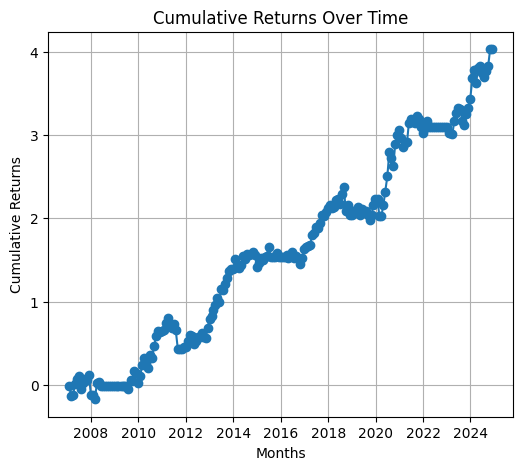

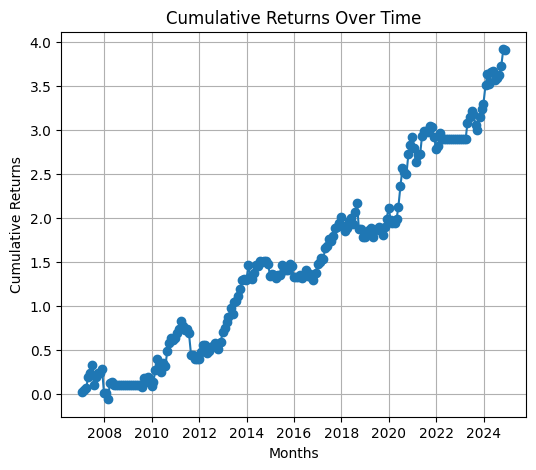

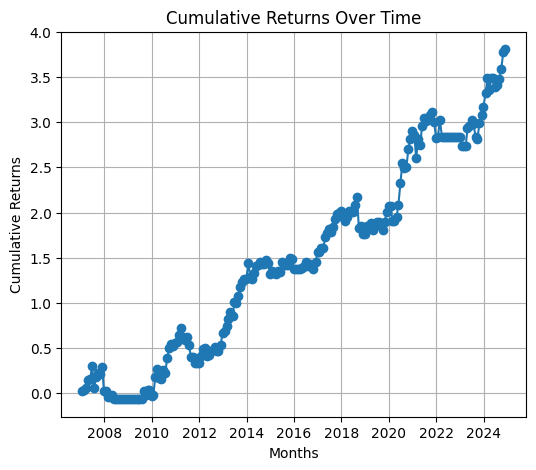

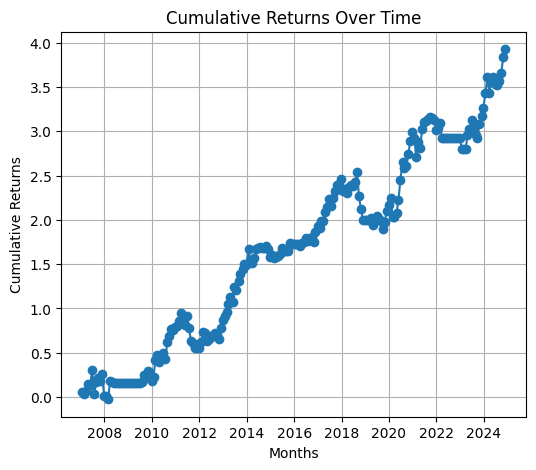

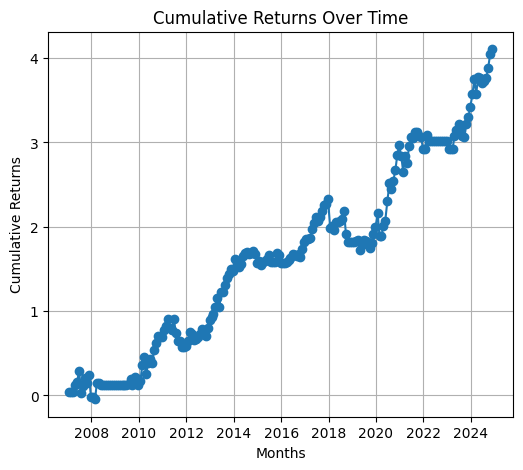

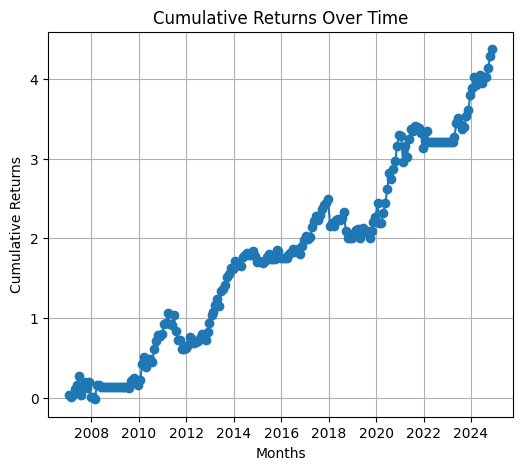

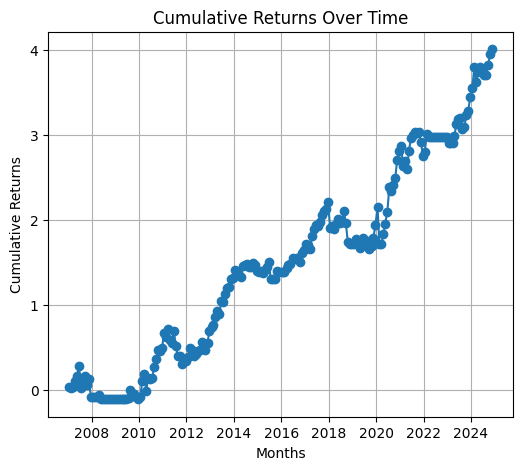

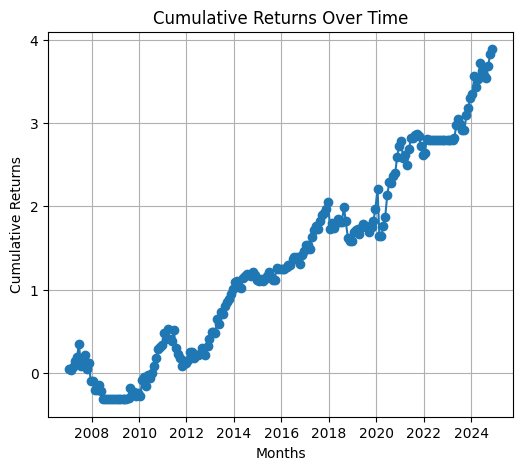

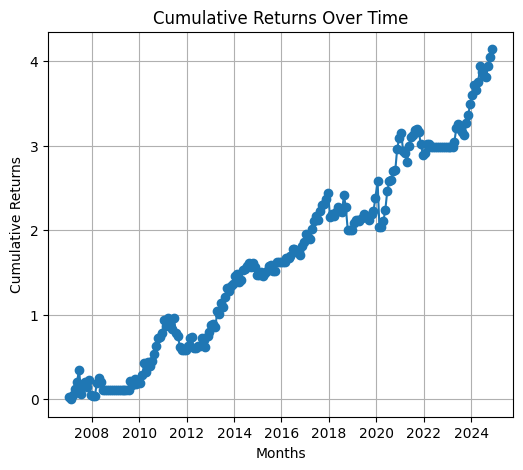

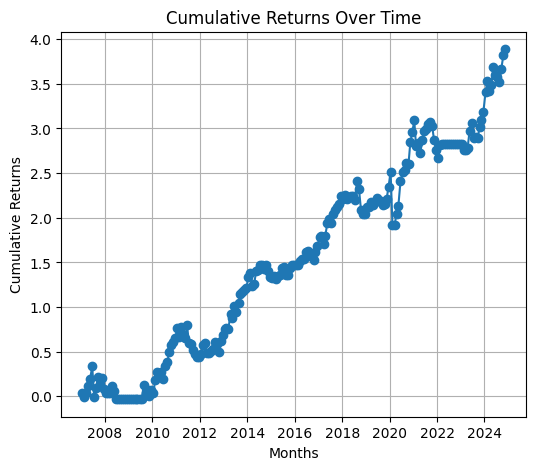

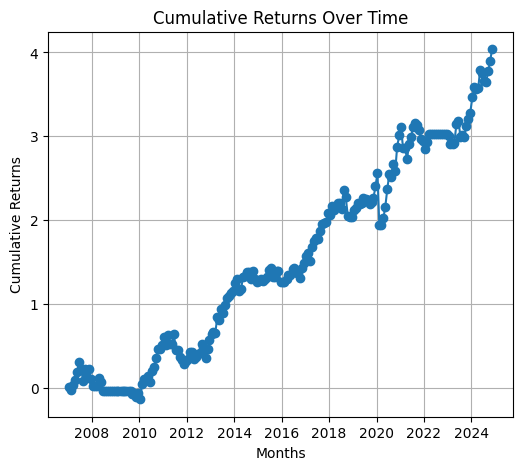

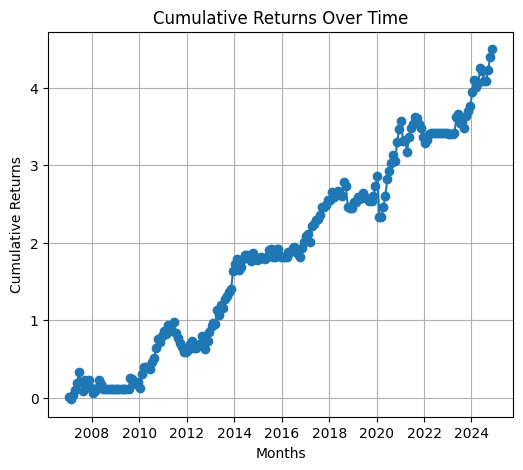

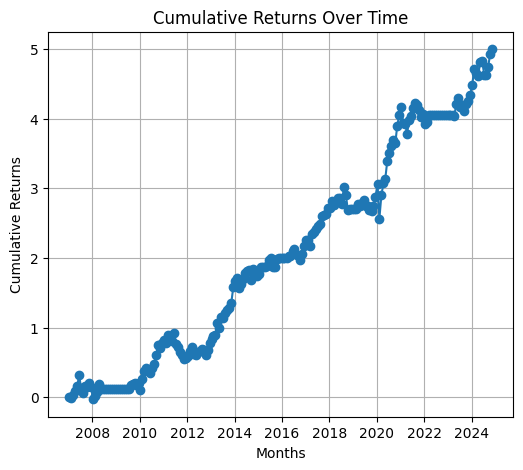

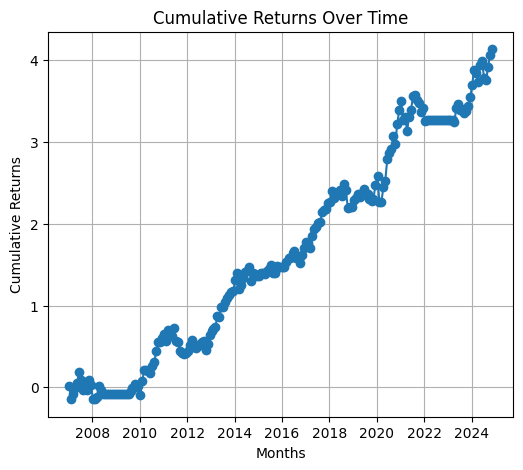

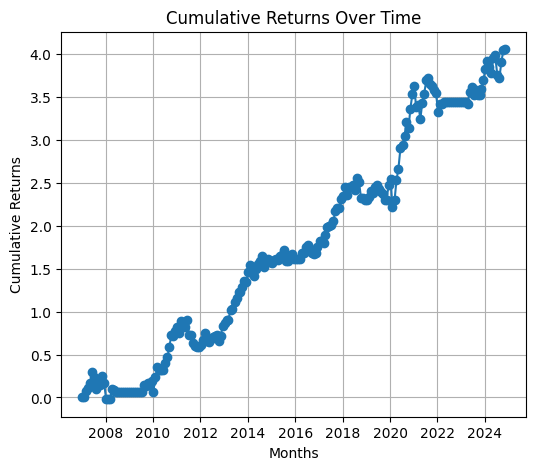

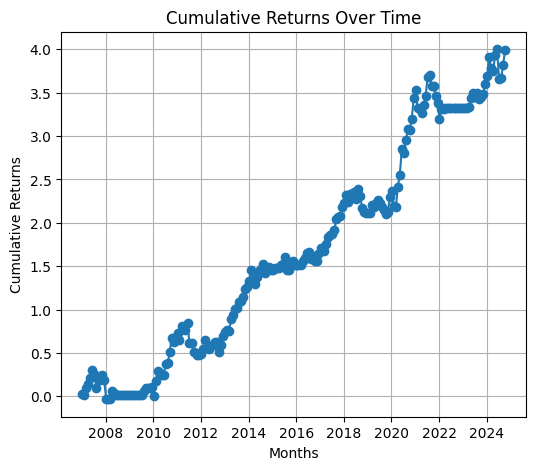

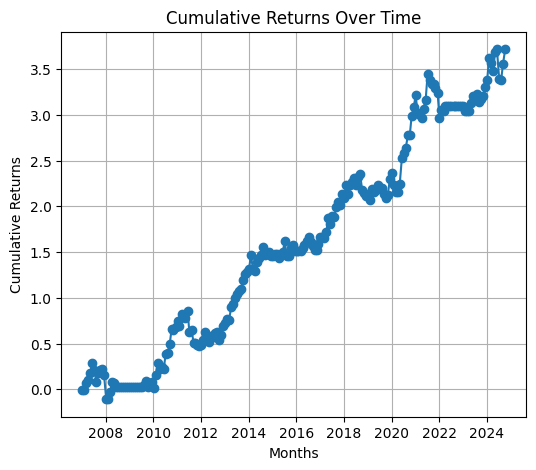

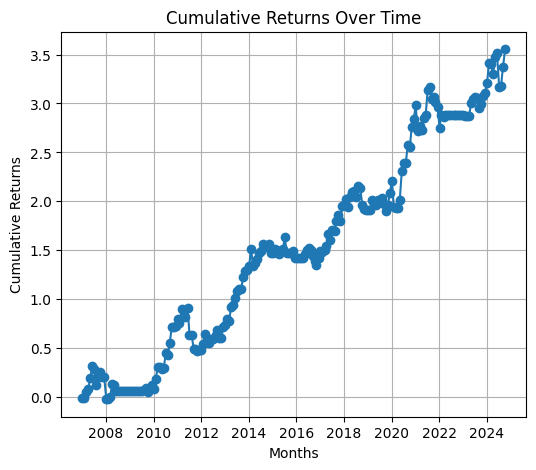

In [7]:
for number in range(18):
    plot_returns(returns=retss[number], diffRebal=True)